In [1]:
#-*- coding:utf-8 -*-
import jieba
import sys
import os
import pandas as pd
from string import digits
from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

### 建立function --> fileinpath()
### 使用glob模組將路徑./files資料夾內所有的文本txt檔名稱讀進來
### 將這些txt檔名稱儲存到textfile這個list

In [2]:
import os
import glob
def textfile():
    files = glob.glob("./files/*台紙.txt")
    return files
textfile=textfile()
textfile

['./files\\20140429台紙.txt',
 './files\\20140613台紙.txt',
 './files\\20140619台紙.txt',
 './files\\20140728台紙.txt',
 './files\\20160924台紙.txt',
 './files\\20161018台紙.txt',
 './files\\20170209台紙.txt',
 './files\\20170302台紙.txt',
 './files\\20170426台紙.txt',
 './files\\20170628台紙.txt']

### 自定義jieba字典，存檔到dict.txt

In [3]:
dictlist = ['股東臨時會','智冠','大同股份有限公司','公允價值','財務報表','林蔚山','信用評等']
d = open('dict.txt','w+',encoding='utf8')
for i in dictlist:
    d.write(i+'\n')
d.close()
jieba.load_userdict('dict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 3.797 seconds.
Prefix dict has been built succesfully.


### 定義停止詞與要剔除的特殊符號

In [4]:
stop = open('stopwords.txt','r',encoding='UTF-8-sig')
stopwords = stop.readlines()
stop.close()
stopwords = [x.strip() for x in stopwords]
stopwords

['我',
 '對',
 '年',
 '月',
 '的',
 '1',
 '2',
 '(',
 ')',
 '/',
 '於',
 '大同',
 '公司',
 '4',
 '106',
 '臺',
 '本',
 '人',
 '為',
 '之',
 '北',
 '5',
 '有',
 '元',
 '一事',
 'TCRI',
 'ai',
 '台灣',
 '之爭',
 '表示',
 '億元',
 '今年',
 '指出',
 '記者',
 '台紙',
 '智冠',
 '榮剛',
 '台苯',
 '遊戲',
 '目前',
 '去年']

In [5]:

puncs = '！？｡＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏.。'

### 將textfile(list)內的文本讀取進來
### 使用jieba斷詞並加入corpus(list)之中
### 一個文本就是一個string，斷詞用空白隔開

In [6]:
# Take each line in target_txt as an unique document
# Cut each line for trarget_txt, and collect it in corpus.

corpus=[]
corpus_1=[]
jieba.load_userdict('dict.txt')
for t in textfile:
    f = open(t,'r', encoding ="utf-8")
    r = f.read()
    remove_digits = str.maketrans('', '', digits)
    r = r.translate(remove_digits)
    r_list = jieba.cut(r, cut_all=False)
    r_list = list(r_list)
    
    for i in range(40):
        #好像多刪幾次就會成功了= =
        #我重複刪5次
        #如果再出現可以再增加次數
        for w in r_list:
            if (w in stopwords) or (w in puncs) or (w < '\u4e00') or (w > '\u9fff'):
                r_list.remove(w)
    st=" ".join(r_list)
    corpus.append(st)
corpus

['財經事 能 讓 奮起 寧靜 革命 財經事 能 讓 奮起 寧靜 革命 點擊 圖片 可 瀏覽 相關 圖片 證券界 王金平 簡鴻文 聯手 戴誠志 拿下 經營權 董監 改選 最後過 戶 日 之前 股價 沒有 任何 波動 看不出 任何 市場 派 要 搶親 一場 股權爭 奪戰 竟然 可以 這麼 安靜 因台紙 張家 無心 經營 績效 不見 起色 三年 前 就 想 拿下 經營權 簡鴻文 家族 是 怎麼 做到 黃 琴雅 從來 沒有 一場 敵 雙方 股權爭 奪戰 可以 這麼 安靜 完全 看不到 任何 煙硝味 卻 辦到 了 即將 在 六月 十二日 進行 董監 改選 在 四月 十二日 最後過 戶 日 之前 股價 沒有 任何 波動 市場 也 沒 傳出 任何 市場 派 要 搶親 消息 與 三年 前 董監 改選 相比 走勢 相對 穩定 股價 一直 在 十一 至 十三元 間 盤整 少 有人 知道 一群 市場 派 人士 正在 進行 一場 寧靜 革命 王貴增 蔡天贊 共 襄盛舉 從 集保 中心 庫存 資料 來 看 持股 千張 以上 戶頭 連續 十六 個 呈現 增加 意即 每個 都 大戶 買 進千張 以上 且 連買 了 十六 個 是 台股 中連續 有千張 大戶 增加 第一名 顯見 籌碼 幾乎 都 被 大戶 吸引 了 使得 從 二 一 三年 十月 以來 日 成交量 很少 超過 四百 張 最近 則 只有 二 三百 張 量 幾乎 都 不見 了 然而 這些 千張 大戶並 不是 原始 董監事 因從 集保庫 存資料 顯示 董監事 持股 完全 沒有 增加 且 董監事 持股 比率 僅有 九 五四 在 一五 家 上市 櫃 中 排名 第一 二七 五名 是 董監 持股 排名 後 段 班 持股 嚴重 不足 自然 成為 有心人 覬覦 對象 這群 大戶 是 誰 據 瞭解 有三人 持股 超過 上 萬張 一位 是 原本 大 股東 兆 豐證券 董事 長 簡鴻文 一位 是 京城 銀行 董事 長 戴誠志 一位 是 中纖 王家 老 三王 貴增 他們 至少 都 各 持有 三 以上 另外 包括 京城 建設 董事 長 蔡天贊 等 也 來 共 襄盛舉 他們 都 是 持有 台股 數千張 以上 大戶 其中 簡鴻文 是 最 關鍵 人物 據 瞭解 簡鴻文 已 向 兆 豐金 旗下 兆 豐證券 申請 退休 轉任 兆 豐證券 顧問 專心 打 這場 股權爭 奪戰

### 訓練tfidf模型
### 將詞頻向量矩陣存到變數tfidf
### 將文字列表存到變數words

In [7]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
words = vectorizer.get_feature_names()
print("len(words): ", len(words))

len(words):  2047


In [8]:
print("tfidf.shape: ", tfidf.shape)
tfidf

tfidf.shape:  (10, 2047)


<10x2047 sparse matrix of type '<class 'numpy.float64'>'
	with 2893 stored elements in Compressed Sparse Row format>

### 將tfidf矩陣中>0.05的詞顯示出來

In [9]:
# check each document
for i in range(len(corpus)):
    print('----Document {0}----'.format(i))
    for j in range(len(words)):
        if tfidf[i,j] > 0.05:
            print(words[j], tfidf[i,j], i ,j)   

----Document 0----
一五 0.06929400614584613 0 7
一位 0.10307199131544913 0 10
一場 0.1039410092187692 0 19
三年 0.13745757951688137 0 71
不少 0.058906235922882015 0 99
不是 0.05153599565772456 0 103
不見 0.1039410092187692 0 110
之前 0.058906235922882015 0 159
京城 0.05579846772628358 0 218
人士 0.058906235922882015 0 222
他們 0.08835935388432302 0 233
以上 0.2078820184375384 0 236
任何 0.17323501536461533 0 241
企業 0.07730399348658684 0 244
使得 0.058906235922882015 0 266
傳出 0.058906235922882015 0 298
再起 0.058906235922882015 0 391
創造 0.058906235922882015 0 436
十二日 0.06929400614584613 0 463
十六 0.058906235922882015 0 470
千張 0.06929400614584613 0 477
去年底 0.06929400614584613 0 503
只要 0.058906235922882015 0 523
可以 0.08835935388432302 0 526
台股 0.058906235922882015 0 547
圖片 0.06929400614584613 0 626
增加 0.08835935388432302 0 651
大戶 0.2078820184375384 0 679
大股 0.05153599565772456 0 690
大買 0.06929400614584613 0 692
奪戰 0.08835935388432302 0 704
奮起 0.06929400614584613 0 705
安靜 0.06929400614584613 0 734
完全 0.05153599565772456

立德 0.051299797495152746 3 1474
純益 0.08721902923855378 3 1510
紙具 0.051299797495152746 3 1513
經營 0.06831781900021358 3 1549
經營權 0.07501964002547916 3 1551
習性 0.051299797495152746 3 1575
考慮 0.10259959499030549 3 1589
股息 0.051299797495152746 3 1612
能源 0.051299797495152746 3 1634
舊換 0.051299797495152746 3 1655
艱困 0.051299797495152746 3 1658
萬股 0.051299797495152746 3 1670
董事 0.10387139301360879 3 1672
蘋果 0.051299797495152746 3 1688
計劃 0.051299797495152746 3 1717
討論 0.051299797495152746 3 1724
設備 0.1144595162554687 3 1725
認真 0.051299797495152746 3 1738
豐富 0.051299797495152746 3 1756
買下 0.051299797495152746 3 1774
買到 0.10259959499030549 3 1775
貸款 0.051299797495152746 3 1778
資料 0.07630634417031247 3 1780
賠錢 0.10259959499030549 3 1798
購物 0.051299797495152746 3 1801
購物台 0.30779878497091645 3 1802
購物業者 0.051299797495152746 3 1803
還沒到 0.051299797495152746 3 1908
還能 0.051299797495152746 3 1909
都過 0.051299797495152746 3 1914
金錢 0.051299797495152746 3 1930
金額 0.051299797495152746 3 1931
銀年 0.051299797

資本額 0.053806273710590886 7 1782
資產 0.05245670200111203 7 1785
資金 0.060986997858683334 7 1794
超值 0.12554797199137874 7 1811
這些 0.10672724625269583 7 1846
這場 0.060986997858683334 7 1851
這是 0.060986997858683334 7 1856
過去 0.09585386111698521 7 1889
還有 0.091480496788025 7 1907
開發 0.05335641647409793 7 1942
除了 0.0592970971601287 7 1954
青睞 0.07174169828078786 7 1983
高林 0.12554797199137874 7 2028
----Document 8----
上演 0.05368056292283329 8 83
不但 0.05368056292283329 8 89
不要 0.10736112584566658 8 109
不解 0.05368056292283329 8 111
之姿 0.05368056292283329 8 160
事件 0.05368056292283329 8 174
今日 0.05368056292283329 8 229
介入 0.05368056292283329 8 230
仍不斷 0.05368056292283329 8 231
代表人 0.10736112584566658 8 234
作業 0.05368056292283329 8 264
依據 0.05368056292283329 8 274
保留 0.05368056292283329 8 278
候選人 0.10736112584566658 8 282
充分 0.05368056292283329 8 322
入席 0.05368056292283329 8 333
全體 0.05368056292283329 8 342
公開 0.05368056292283329 8 364
共同努力 0.05368056292283329 8 374
再度 0.05368056292283329 8 388
再次 0.0

股利 0.05722762493063828 9 1607
股東 0.14941947707038725 9 1614
股東會 0.08902702949552857 9 1618
自結合 0.0673193819215908 9 1643
良宇續 0.0673193819215908 9 1657
董事 0.1908307955550918 9 1672
董專才 0.0673193819215908 9 1674
董座 0.05006740939598248 9 1675
董擔 0.0673193819215908 9 1676
董為 0.0673193819215908 9 1678
薪酬 0.1346387638431816 9 1684
虧損 0.10841683338669017 9 1692
補案 0.0673193819215908 9 1701
許良宇 0.05006740939598248 9 1727
許良宇續 0.0673193819215908 9 1729
認列 0.1346387638431816 9 1735
認列費 0.0673193819215908 9 1736
財務 0.05006740939598248 9 1764
財報 0.0673193819215908 9 1765
財經 0.0673193819215908 9 1768
資產及 0.05722762493063828 9 1787
資訊 0.05006740939598248 9 1792
轉型 0.15020222818794746 9 1824
轉盈 0.05722762493063828 9 1826
逐步 0.0673193819215908 9 1844
通過 0.05006740939598248 9 1871
邁進 0.0673193819215908 9 1902
門檻 0.0673193819215908 9 1940
開股 0.0673193819215908 9 1943
附加 0.05722762493063828 9 1949
隨即 0.05722762493063828 9 1959
雖低 0.0673193819215908 9 1968
領員 0.0673193819215908 9 1997
類產品 0.06731938192159

### 將tfidf矩陣用pandas套件將結果整理為DataFrame格式

In [10]:
df_tfidf = pd.DataFrame(words,columns=['words'])
for i in range(tfidf.shape[0]):
    docnumber=textfile[i]
    df_tfidf[docnumber] = pd.DataFrame(tfidf.toarray()[i].T)

df_tfidf

,words,./files\20140429台紙.txt,./files\20140613台紙.txt,./files\20140619台紙.txt,./files\20140728台紙.txt,./files\20160924台紙.txt,./files\20161018台紙.txt,./files\20170209台紙.txt,./files\20170302台紙.txt,./files\20170426台紙.txt,./files\20170628台紙.txt
0,一九,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.017935,0.000000,0.000000
1,一九九,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.071742,0.000000,0.000000
2,一九八,0.000000,0.000000,0.038477,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,一九六二年,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.017935,0.000000,0.000000
4,一九六五年,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.017935,0.000000,0.000000
5,一九四六年,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.017935,0.000000,0.000000
6,一二,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.053806,0.000000,0.000000
7,一五,0.069294,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,一亮,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.017935,0.000000,0.000000
9,一人腳,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.017935,0.000000,0.000000


In [11]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff') or (w in stopwords) or (w in puncs) :
        return 0
    else:
        return 1
df_tfidf=df_tfidf[df_tfidf['words'].apply(chinese) !=0]
df_tfidf

,words,./files\20140429台紙.txt,./files\20140613台紙.txt,./files\20140619台紙.txt,./files\20140728台紙.txt,./files\20160924台紙.txt,./files\20161018台紙.txt,./files\20170209台紙.txt,./files\20170302台紙.txt,./files\20170426台紙.txt,./files\20170628台紙.txt
0,一九,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.017935,0.000000,0.000000
1,一九九,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.071742,0.000000,0.000000
2,一九八,0.000000,0.000000,0.038477,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,一九六二年,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.017935,0.000000,0.000000
4,一九六五年,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.017935,0.000000,0.000000
5,一九四六年,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.017935,0.000000,0.000000
6,一二,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.053806,0.000000,0.000000
7,一五,0.069294,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,一亮,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.017935,0.000000,0.000000
9,一人腳,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.017935,0.000000,0.000000


### 儲存到excel --> tfidf.xlsx
### 將df_tfidf表格存到sheet -->tfidf_1

In [12]:
writer = pd.ExcelWriter('tfidf.xlsx')
df_tfidf.to_excel(writer,'tfidf_1')
writer.save()

In [13]:
tfarray=tfidf.toarray()
tfarray

array([[0.        , 0.        , 0.        , ..., 0.034647  , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.03847719, ..., 0.        , 0.03270912,
        0.        ],
       ...,
       [0.01793542, 0.0717417 , 0.        , ..., 0.        , 0.0304935 ,
        0.01793542],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

### 使用CountVectorizer()方法
### 統計corpus之中個別文本的文字次數
### 用pandas套件將結果整理為DataFrame格式
### column-->words是所有出現的文字
### 右邊每一個column都是一個文本的文字出現次數統計

In [14]:
vec = CountVectorizer()
X = vec.fit_transform(corpus)
df = pd.DataFrame(vec.get_feature_names(),columns=['words'])
for i in range(X.shape[0]):
    docnumber='doc'+str(i+1)+'_tfdif'
    df[docnumber] = pd.DataFrame(X.toarray()[i].T)
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,doc10_tfdif
0,一九,0,0,0,0,0,0,0,1,0,0
1,一九九,0,0,0,0,0,0,0,4,0,0
2,一九八,0,0,1,0,0,0,0,0,0,0
3,一九六二年,0,0,0,0,0,0,0,1,0,0
4,一九六五年,0,0,0,0,0,0,0,1,0,0
5,一九四六年,0,0,0,0,0,0,0,1,0,0
6,一二,0,0,0,0,0,0,0,3,0,0
7,一五,2,0,0,0,0,0,0,0,0,0
8,一亮,0,0,0,0,0,0,0,1,0,0
9,一人腳,0,0,0,0,0,0,0,1,0,0


In [15]:
df.head()

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,doc10_tfdif
0,一九,0,0,0,0,0,0,0,1,0,0
1,一九九,0,0,0,0,0,0,0,4,0,0
2,一九八,0,0,1,0,0,0,0,0,0,0
3,一九六二年,0,0,0,0,0,0,0,1,0,0
4,一九六五年,0,0,0,0,0,0,0,1,0,0


### 建立chinese(w)方法，判斷輸入的w是不是在漢字區間，是 -->回傳1    不是-->回傳0
 - 使用unicode編碼剔除不是漢字的項目
 - 漢字範圍u4e00- u9fff
 
### 判斷df表格中是漢字的項目才保留下來

 - df['words'].apply(chinese)會將df表格中'words'這個column內的所有項目作為w執行chinese(w)方法，會回傳0或1
 - df['words'].apply(chinese) !=0判斷回傳不等於0的項目(漢字)
 - df[df['words'].apply(chinese) !=0]用df[...]叫出所有符合上述判斷的項目的rows 
 - 將這個結果重新儲存回df表格
 
### 這樣df表格中就只會剩下漢字的項目 

In [16]:
def chinese(w):
    if (w < '\u4e00') or (w > '\u9fff'):
        return 0
    else:
        return 1
df=df[df['words'].apply(chinese) !=0]
df

,words,doc1_tfdif,doc2_tfdif,doc3_tfdif,doc4_tfdif,doc5_tfdif,doc6_tfdif,doc7_tfdif,doc8_tfdif,doc9_tfdif,doc10_tfdif
0,一九,0,0,0,0,0,0,0,1,0,0
1,一九九,0,0,0,0,0,0,0,4,0,0
2,一九八,0,0,1,0,0,0,0,0,0,0
3,一九六二年,0,0,0,0,0,0,0,1,0,0
4,一九六五年,0,0,0,0,0,0,0,1,0,0
5,一九四六年,0,0,0,0,0,0,0,1,0,0
6,一二,0,0,0,0,0,0,0,3,0,0
7,一五,2,0,0,0,0,0,0,0,0,0
8,一亮,0,0,0,0,0,0,0,1,0,0
9,一人腳,0,0,0,0,0,0,0,1,0,0


### 儲存到excel --> wordscount.xlsx
### 將df表格存到sheet -->wordscount_1

In [17]:
writer = pd.ExcelWriter('wordscount.xlsx')
df.to_excel(writer,'wordscount_1')
writer.save()

### 全部文字的dict建立文字雲

In [18]:
df['sum']=df.sum(axis=1)
wordDict=dict(zip(df['words'], df['sum']))
wordDict

{'一九': 1,
 '一九九': 4,
 '一九八': 1,
 '一九六二年': 1,
 '一九六五年': 1,
 '一九四六年': 1,
 '一二': 3,
 '一五': 2,
 '一亮': 1,
 '一人腳': 1,
 '一位': 7,
 '一個': 3,
 '一億元': 1,
 '一元': 1,
 '一分': 1,
 '一切': 1,
 '一千': 1,
 '一千多': 1,
 '一向': 1,
 '一場': 3,
 '一塊': 1,
 '一定': 3,
 '一家': 5,
 '一席': 2,
 '一年': 3,
 '一度': 3,
 '一張': 1,
 '一旦': 2,
 '一樣': 2,
 '一次': 1,
 '一次性': 3,
 '一步': 3,
 '一派': 1,
 '一直': 7,
 '一看': 1,
 '一票': 1,
 '一筆': 2,
 '一簣': 1,
 '一群': 1,
 '一職': 4,
 '一舉': 2,
 '一般': 4,
 '一號': 1,
 '一起': 1,
 '一路': 1,
 '一躍漲': 1,
 '七二億元': 1,
 '七五': 3,
 '七億元': 1,
 '七元': 2,
 '七八': 4,
 '七千': 1,
 '七年': 2,
 '七月': 1,
 '七萬坪': 1,
 '三九': 1,
 '三二一': 1,
 '三井': 1,
 '三位': 1,
 '三個': 1,
 '三元': 6,
 '三八': 1,
 '三十': 1,
 '三十一': 4,
 '三十七': 1,
 '三十八': 1,
 '三四': 1,
 '三坪': 2,
 '三大產品': 1,
 '三家': 1,
 '三席': 2,
 '三年': 12,
 '三座': 3,
 '三方': 1,
 '三月底': 1,
 '三王': 2,
 '三百': 4,
 '三百多': 1,
 '上下游': 1,
 '上午': 1,
 '上半年': 1,
 '上市': 3,
 '上市公司': 2,
 '上演': 1,
 '上門': 1,
 '下來': 1,
 '下午': 1,
 '下半年': 1,
 '下台': 1,
 '不但': 1,
 '不佳': 2,
 '不俗': 1,
 '不僅': 1,
 '不再': 1,
 '不利': 1,
 '不到': 2,
 '不動產'

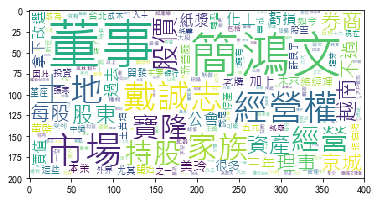

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

font = r"C:/Users/USER/Desktop/three/msjh.ttc"
wordcloud = WordCloud(font_path = font, background_color="white")
wordcloud.fit_words(wordDict)
plt.imshow(wordcloud)

In [20]:
ten = sorted(wordDict.items(), key=lambda x: x[1],reverse = True)
ten[:30]

[('董事', 78),
 ('簡鴻文', 69),
 ('市場', 36),
 ('經營權', 30),
 ('土地', 28),
 ('戴誠志', 27),
 ('家族', 23),
 ('經營', 20),
 ('寶隆', 19),
 ('持股', 19),
 ('股價', 18),
 ('股東', 18),
 ('資產', 17),
 ('越南', 17),
 ('京城', 16),
 ('券商', 16),
 ('每股', 15),
 ('理事', 15),
 ('不過', 14),
 ('公會', 14),
 ('化工', 13),
 ('紙漿', 13),
 ('虧損', 13),
 ('過去', 13),
 ('三年', 12),
 ('價值', 12),
 ('拿下', 12),
 ('改選', 12),
 ('美玲', 12),
 ('加上', 11)]

In [21]:
data = []
for t in ten[:15]:
    data.append(t[1])
label = []
for t in ten[:15]:
    label.append(t[0])

([<matplotlib.axis.XTick at 0xf3a82b0>,
 <a list of 15 Text xticklabel objects>)

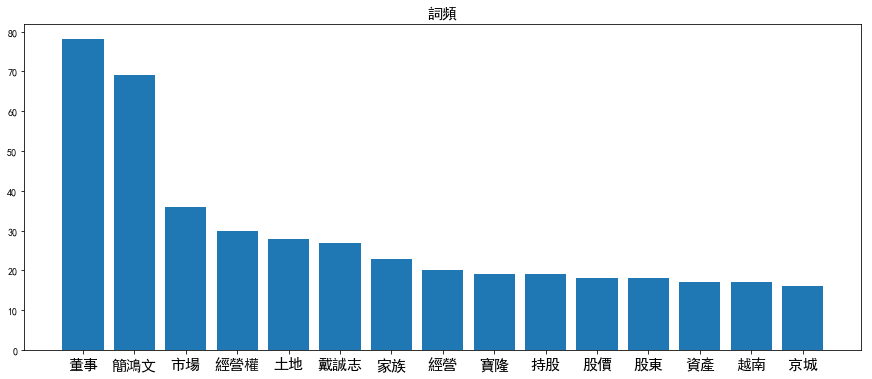

In [22]:
plt.figure(figsize=(15,6))
plt.bar(range(0,15),data)
plt.title("詞頻",fontsize=15)
plt.xticks(range(0,15),label,fontsize=15)

In [23]:
from sklearn.decomposition import PCA as sklearnPCA
import matplotlib.pyplot as plt
X = tfidf.toarray()
sklearn_pca = sklearnPCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)
Y_sklearn

array([[-0.42443466, -0.11511393],
       [-0.28842776,  0.24969961],
       [-0.28769499,  0.01041701],
       [ 0.07072277, -0.27933544],
       [ 0.4801886 ,  0.0243647 ],
       [ 0.55436323, -0.32155761],
       [-0.24637486,  0.0264431 ],
       [-0.24354596, -0.51356304],
       [-0.05689156,  0.62569953],
       [ 0.44209519,  0.29294607]])

No handles with labels found to put in legend.


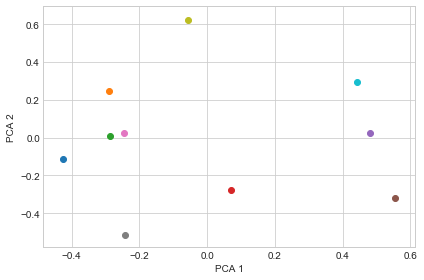

In [24]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    #for lab, col in zip(('low', 'medium', 'high'),
                        #('red', 'green','orange')):
    for i in range(len(Y_sklearn)):

        plt.scatter(Y_sklearn[i][0], Y_sklearn[i][1])
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [25]:
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters = 2)
X_clustered = kmeans.fit_predict(Y_sklearn)

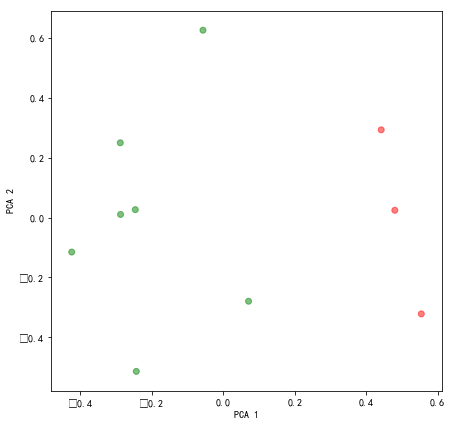

In [27]:
#Define our own color map
LABEL_COLOR_MAP = {0:'r', 1: 'g', 2: 'b', 3: 'y'}
label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]

# Plot the scatter digram
plt.figure(figsize = (7,7))
plt.scatter(Y_sklearn[:,0],Y_sklearn[:,1], c= label_color, alpha=0.5) 
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()